In [17]:
from ecell4 import *
import numpy as np
import math
import sys
import os
#%matplotlib inline
#import matplotlib.pyplot as plt
rng = core.GSLRandomNumberGenerator()

phio = 0.5#float(sys.argv[1]) 
Dratio=  1.#float(sys.argv[2]) 
run = 0#int(sys.argv[3]) 
rm = 0.005
L = 2.
rv = rm
H = 3*rv*2
Nt = 1
tend = -1
Dt = 1.
Do = Dt/Dratio
tmol = (2*rv)**2 / (4*Dt)
ori = Real3(0.5*H,0,0)
lg1 = np.logspace(math.log10(2.1*tmol),-3,10)
lg2 = np.logspace(-3,tend,30)[1:]
tt = np.concatenate(([0.,tmol],lg1,lg2))
dur = tt[-1]
unit0 = Real3(0,0,L)
unit1 = Real3(0,L,0)
w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),rv)
lx,ly,lz = tuple(w.actual_lengths())
#print 'lx,ly,lz',lx,ly,lz
cs = w.row_size()
ls = w.layer_size()
Nmv = cs*ls
No = int(Nmv*phio)
with species_attributes():
    T | {'D':str(Dt),'radius':str(rv),'location':'M'}
    O | {'D':str(Do),'radius':str(rv),'location':'M'}
m=get_model()
print 'Dratio',Dratio
print 'L={},rm={},Dt={},Do={},tmol={},dur={}'.format(L,rm,Dt,Do,tmol,dur)
print 'phit',float(Nt)/Nmv,'phio',float(No)/Nmv
print 'Nt',Nt,'No',No,'Nv',Nmv

def singlerun(rr):
    msd = np.zeros(len(tt),float)
    rng.seed(rr)
    w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),rv,rng)
    x,y,z = w.actual_lengths()
    w.bind_to(m)
    w.add_structure(Species('M'),PlanarSurface(ori,unit0,unit1))
    w.add_molecules(Species('T'),Nt)
    w.add_molecules(Species('O'),No)
    sim = spatiocyte.SpatiocyteSimulator(w)
    pids = [pid for pid, p in w.list_particles(Species("T"))] #particle IDs
    #obs = FixedIntervalTrajectoryObserver(dt,pids)
    obs = TimingTrajectoryObserver(tt,pids,True,tmol)
    sim.run(dur,obs)
    data=obs.data()
    for i in range(Nt):
        msd += np.array(
            [np.linalg.norm(np.array(tuple(pos)) - np.array(tuple(data[i][0]))) ** 2
                 for pos in data[i]]) 
        #viz.plot_trajectory(obs)    
    return msd/Nt
#dirname = 'runscript/data/Dratio/D'+str(Dratio)+'/phi'+str(phio)
#if not os.path.exists(dirname):
#    os.makedirs(dirname)
msd = singlerun(run)
#name = 'runscript/data/Dratio/D'+str(Dratio)+'/phi'+str(phio)+'/LS2Dmoc_phi'+str(phio)+'_D'+str(Dratio)+'run'+str(run)+'.csv'
#filename = open(name,'w')
#np.savetxt(filename,np.column_stack((tt,msd)),delimiter=',',fmt='%s')
#filename.close()
#print 'saving to ',name

Dratio 1.0
L=2.0,rm=0.005,Dt=1.0,Do=1.0,tmol=2.5e-05,dur=0.1
phit 2.13383407306e-05 phio 0.5
Nt 1 No 23432 Nv 46864


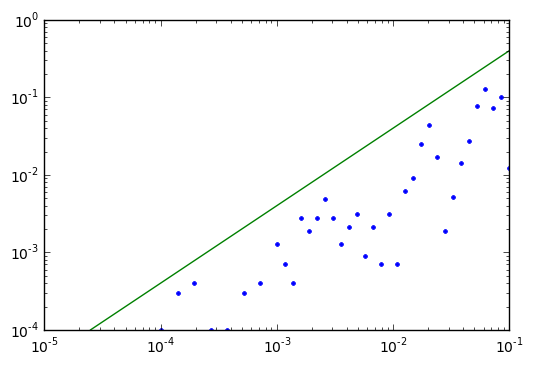

In [18]:
plt.loglog(tt,msd,'.')
plt.plot(tt,4*tt)

In [ ]:
f1,ax1 = plt.subplots(1)
f2,ax2 = plt.subplots(1)
Deffall = []
for phit in phits:
    MSD = run()
    ax1.loglog(tt,MSD,'.',label='phi='+str(phit))
    Deff = MSD[1:]/tt[1:]/4/Dt
    ax2.semilogx(tt[1:],Deff,'.',label='phi='+str(phit))
    Deffall.append(Deff)
ax1.plot(tt,4*Dt*tt,'g-')  #theoretical line
ax1.set_xlabel("time")
ax1.set_ylabel("msd")
ax1.legend(loc='best')
ax2.set_xlabel("time")
ax2.set_ylabel("D/Do")
#ax2.set_ylim(0,1.1)
ax2.legend(loc='best')
plt.show()
Deffs=[]
for dff in Deffall:
    Deffs.append(np.mean(dff[(tt>0.5)[1::]]))  

In [3]:
Deffs,phits

([0.88139293492056958,
  0.65926625952937068,
  0.4328727540613489,
  0.24333465701250864,
  0.072002359752437087],
 [0.1, 0.3, 0.5, 0.7, 0.9])

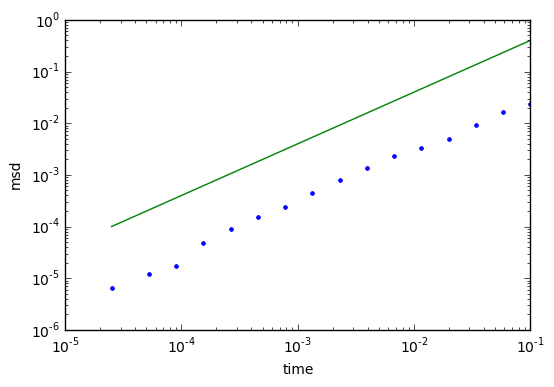

In [7]:
plt.loglog(tt,msd,'.')
plt.plot(tt,4*Dt*tt,'g-')  #theoretical line
plt.xlabel("time")
plt.ylabel("msd")
plt.show()
print 

(0, 1.1)

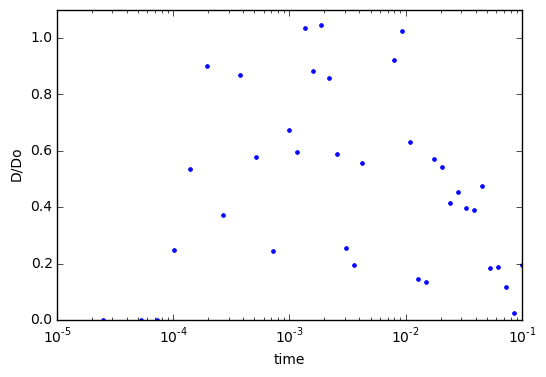

In [16]:
Deff = msd[1:]/tt[1:]/4/Dt
plt.semilogx(tt[1:],Deff,'.')
plt.xlabel("time")
plt.ylabel("D/Do")
plt.ylim(0,1.1)
#filename = open('data/2Dcrowding_LS_phi'+str(phio)+'.csv','w')
#np.savetxt(filename,np.column_stack((msd,t)),delimiter=',',fmt='%s')
#filename.close()

In [4]:
print np.mean(Deff[(t>.1)[1::]])

0.791857939863


In [20]:
dat = np.loadtxt('data/2Dcrowding_LS_phi'+str(phio)+'.csv',delimiter=',',dtype=np.str_)

In [22]:
print dat

[['0.0' '0.0']
 ['9.93548387097e-05' '2.5e-05']
 ['0.00018247311828' '5e-05']
 ..., 
 ['0.346348172043' '0.24995']
 ['0.346216236559' '0.249975']
 ['0.346320107527' '0.25']]


In [13]:
print len(p)+186+74611

186528
